In [198]:
import pandas as pd
import numpy as np
import seaborn as sn

df = pd.read_csv("autos.csv")

The goal of this data analysis is to find what parameters affect the price of a car. By doing so, the results of this data analysis can be used to explore those same parameters hold up over time as a car graduates into a "classic" status.

In [199]:
df.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
0,2016-03-24T11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24T00:00:00,False,70435,2016-04-07T03:16:57
1,2016-03-24T10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24T00:00:00,False,66954,2016-04-07T01:46:50
2,2016-03-14T12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14T00:00:00,False,90480,2016-04-05T12:47:46
3,2016-03-17T16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17T00:00:00,False,91074,2016-03-17T17:40:17
4,2016-03-31T17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31T00:00:00,False,60437,2016-04-06T10:17:21


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   datecrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offertype            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicletype          333659 non-null  object
 7   yearofregistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerps              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthofregistration  371528 non-null  int64 
 13  fueltype             338142 non-null  object
 14  brand                371528 non-null  object
 15  notrepaireddamage    299468 non-nu

In [201]:
df.describe(include='all')

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,1,NaN,182806
top,2016-03-24T14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03T00:00:00,False,NaN,2016-04-07T06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,371528,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,NaN,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,NaN,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,NaN,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,NaN,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,NaN,71546.00000,NaN


In [202]:
#Dropping some irrelevant columns, converting km to mi

df = df.drop(["seller", "monthofregistration", "datecreated", "abtest", "lastseen"], axis=1)
df["miles"] = df["kilometer"].apply(lambda x: x * .621371)
df = df.drop("kilometer", axis=1)
print(df["fueltype"].unique())
print(df["offertype"].unique())
print(df["notrepaireddamage"].unique())
print(df["gearbox"].unique())
print(df["vehicletype"].unique())

['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
['Angebot' 'Gesuch']
[nan 'ja' 'nein']
['manuell' 'automatik' nan]
[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']


In [203]:
#Changing some columns from german to english

fuel_eng = {
    "benzin" : "gasoline",
    "andere" : "other",
    "elektro" : "electric",
    "lpg" : "liquid petroleum"
}

offer_eng = {
    "Angebot" : "offer",
    "Gesuch" : "wanted"
}
repaired_eng = {
    "ja" : "Yes",
    "nein" : "No"
}
gearbox_eng = {
    "manuell" : "Manual",
    "automatik" : "Automatic"
}
vehicletype_eng = {
    "kleinwagen" : "compact",
    "limousine" : "limo",
    "cabrio" : "convertible",
    "kombi" : "stationwagon"
}

df = df.replace({"fueltype" : fuel_eng})
df = df.replace({"offertype" : offer_eng})
df = df.replace({"notrepaireddamage" : repaired_eng})
df = df.replace({"gearbox" : gearbox_eng})
df = df.replace({"vehicletype" : vehicletype_eng})
df.head()


,datecrawled,name,offertype,price,vehicletype,yearofregistration,gearbox,powerps,model,fueltype,brand,notrepaireddamage,nrofpictures,postalcode,miles
0,2016-03-24T11:52:17,Golf_3_1.6,offer,480,NaN,1993,Manual,0,golf,gasoline,volkswagen,NaN,False,70435,93205.650
1,2016-03-24T10:58:45,A5_Sportback_2.7_Tdi,offer,18300,coupe,2011,Manual,190,NaN,diesel,audi,Yes,False,66954,77671.375
2,2016-03-14T12:52:21,"Jeep_Grand_Cherokee_""Overland""",offer,9800,suv,2004,Automatic,163,grand,diesel,jeep,NaN,False,90480,77671.375
3,2016-03-17T16:54:04,GOLF_4_1_4__3TÜRER,offer,1500,compact,2001,Manual,75,golf,gasoline,volkswagen,No,False,91074,93205.650
4,2016-03-31T17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,offer,3600,compact,2008,Manual,69,fabia,diesel,skoda,No,False,60437,55923.390


In [204]:
#Age of the car at the time the listing was crawled
df["datecrawled"] = pd.to_datetime(df["datecrawled"])
df["Age"] = df["datecrawled"].dt.year - df["yearofregistration"]
df["Age"].describe()

count    371528.000000
mean         11.422003
std          92.866598
min       -7983.000000
25%           8.000000
50%          13.000000
75%          17.000000
max        1016.000000
Name: Age, dtype: float64

<AxesSubplot: xlabel='Age'>

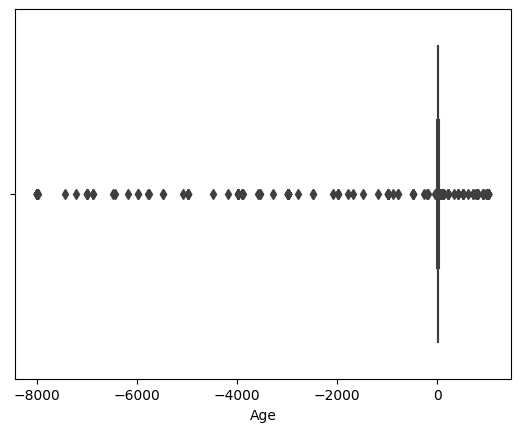

In [205]:
#strange outliers....
sn.boxplot(data=df, x="Age")


In [206]:
outlier_q1 = df["Age"].quantile(.25)
outlier_q3 = df["Age"].quantile(.75)
iqr = outlier_q3 - outlier_q1
outlier_range = [outlier_q1 - 1.5 * iqr, outlier_q3 + 1.5 * iqr]
df_filtered = df[(df["Age"] > outlier_range[0]) & (df["Age"] < outlier_range[1])]
df_filtered["Age"].describe()

count    364383.000000
mean         12.090235
std           6.475806
min          -3.000000
25%           8.000000
50%          12.000000
75%          17.000000
max          30.000000
Name: Age, dtype: float64

<AxesSubplot: xlabel='Age'>

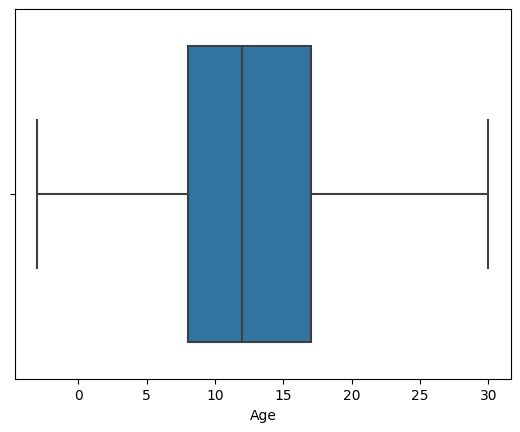

In [207]:
sn.boxplot(data=df_filtered, x="Age")

In [208]:
df_filtered.isna().sum()
#na values for the most part make up about 10% of the data, however, the notrepaireddamage will be handled using average vlaues

datecrawled               0
name                      0
offertype                 0
price                     0
vehicletype           36657
yearofregistration        0
gearbox               18707
powerps                   0
model                 18911
fueltype              31828
brand                     0
notrepaireddamage     69658
nrofpictures              0
postalcode                0
miles                     0
Age                       0
dtype: int64

In [209]:
df_filtered["notrepaireddamage"].value_counts()

No     259033
Yes     35692
Name: notrepaireddamage, dtype: int64

In [210]:
df_filtered["notrepaireddamage"] = df_filtered["notrepaireddamage"].fillna("No")
df_filtered = df_filtered.dropna().reset_index(drop=True)
df_filtered.isna().sum()

/var/folders/wm/j6zh4bsx5kd608f73_8dxtn40000gn/T/ipykernel_24499/3675796672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["notrepaireddamage"] = df_filtered["notrepaireddamage"].fillna("No")


datecrawled           0
name                  0
offertype             0
price                 0
vehicletype           0
yearofregistration    0
gearbox               0
powerps               0
model                 0
fueltype              0
brand                 0
notrepaireddamage     0
nrofpictures          0
postalcode            0
miles                 0
Age                   0
dtype: int64

In [211]:
df_filtered.loc[df_filtered["Age"] > 10, ">10 y/o"] = 1
df_filtered.loc[df_filtered["Age"] < 10, "<10 y/o"] = 1
df_filtered.loc[df_filtered["gearbox"] == "Automatic", "Automatic?"] = 1
df_filtered.loc[df_filtered["gearbox"] == "Manual", "Manual?"] = 1

In [212]:
df_filtered[">10 y/o"] = df_filtered[">10 y/o"].fillna(0)
df_filtered["<10 y/o"] = df_filtered["<10 y/o"].fillna(0)
df_filtered["Manual?"] = df_filtered["Manual?"].fillna(0)
df_filtered["Automatic?"] = df_filtered["Automatic?"].fillna(0)

In [213]:
df_filtered.corr()

/var/folders/wm/j6zh4bsx5kd608f73_8dxtn40000gn/T/ipykernel_24499/1659737963.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filtered.corr()


,price,yearofregistration,powerps,nrofpictures,postalcode,miles,Age,>10 y/o,<10 y/o,Automatic?,Manual?
price,1.000000,0.013084,0.006762,NaN,0.002359,-0.012349,-0.013084,-0.012473,0.013521,0.011406,-0.011406
yearofregistration,0.013084,1.000000,0.094405,NaN,0.059156,-0.490949,-1.000000,-0.798756,0.771483,0.138764,-0.138764
powerps,0.006762,0.094405,1.000000,NaN,0.024391,-0.020413,-0.094405,-0.089472,0.080026,0.162057,-0.162057
nrofpictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalcode,0.002359,0.059156,0.024391,NaN,1.000000,-0.033386,-0.059156,-0.054734,0.055131,-0.024805,0.024805
miles,-0.012349,-0.490949,-0.020413,NaN,-0.033386,1.000000,0.490949,0.454095,-0.496606,-0.045514,0.045514
Age,-0.013084,-1.000000,-0.094405,NaN,-0.059156,0.490949,1.000000,0.798756,-0.771483,-0.138764,0.138764
>10 y/o,-0.012473,-0.798756,-0.089472,NaN,-0.054734,0.454095,0.798756,1.000000,-0.869791,-0.124735,0.124735
<10 y/o,0.013521,0.771483,0.080026,NaN,0.055131,-0.496606,-0.771483,-0.869791,1.000000,0.119262,-0.119262
Automatic?,0.011406,0.138764,0.162057,NaN,-0.024805,-0.045514,-0.138764,-0.124735,0.119262,1.000000,-1.000000


In [214]:
outlier_q1 = df["price"].quantile(.25)
outlier_q3 = df["price"].quantile(.75)
iqr = outlier_q3 - outlier_q1
outlier_range = [outlier_q1 - 1.5 * iqr, outlier_q3 + 1.5 * iqr]
df_filtered = df_filtered[(df_filtered["price"] > outlier_range[0]) & (df_filtered["price"] < outlier_range[1])].reset_index(drop=True)
df_filtered["price"].describe()

count    270603.000000
mean       4341.367295
std        3935.546402
min           0.000000
25%        1250.000000
50%        2990.000000
75%        6500.000000
max       16270.000000
Name: price, dtype: float64

<AxesSubplot: xlabel='price'>

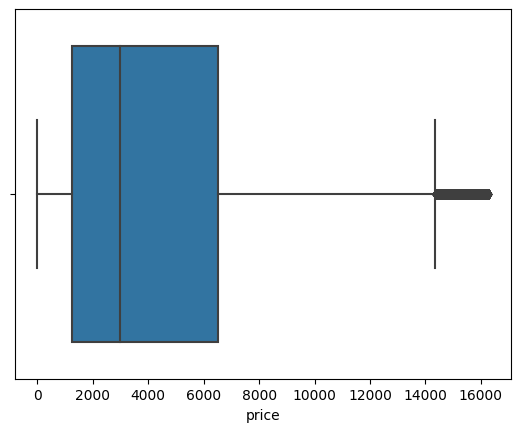

In [215]:
sn.boxplot(data=df_filtered, x="price")

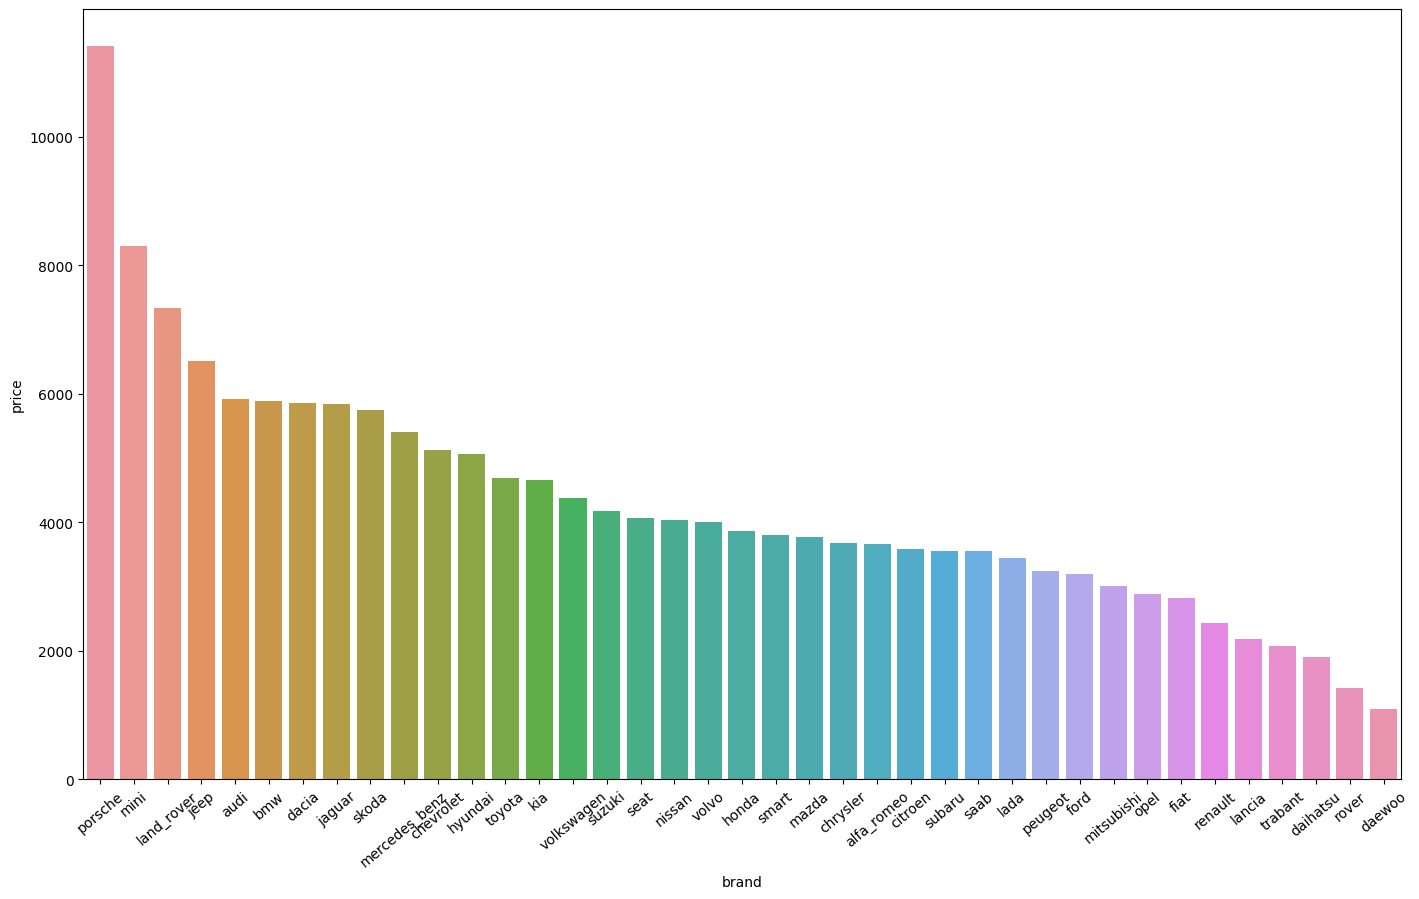

In [216]:

import matplotlib.pyplot as plt
plt.figure(figsize=(17,10))

mean_df = df_filtered.groupby("brand")["price"].mean().reset_index()
mean_df = mean_df.sort_values("price", ascending=False)
ax = sn.barplot(data=mean_df, x="brand", y="price")
plt.xticks(rotation=40)
plt.show()


/var/folders/wm/j6zh4bsx5kd608f73_8dxtn40000gn/T/ipykernel_24499/4125526296.py:4: RuntimeWarning: divide by zero encountered in log
  df_filtered.insert(2, "log_price", [np.log(x) for x in df_filtered["price"]])


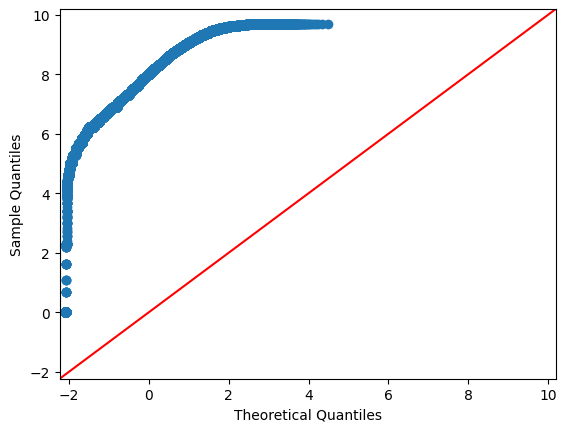

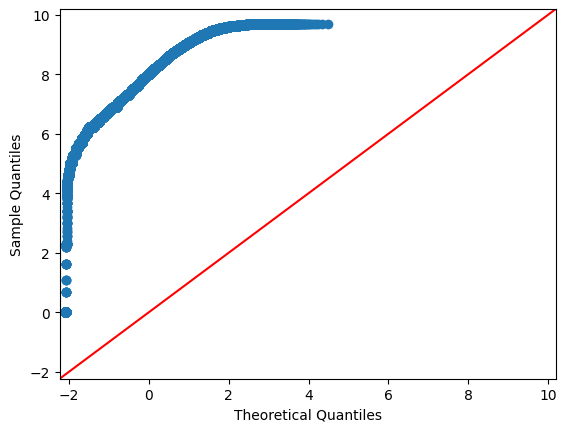

In [217]:
#Checking linearity assumption
import statsmodels.api as sm
import numpy as np
df_filtered.insert(2, "log_price", [np.log(x) for x in df_filtered["price"]])
sm.qqplot(df_filtered["log_price"], line="45")

Because the linearity assumption fails, further analysis of the price can't be confidently made.